## Extract Kathamandu Valley from asia-latest.osm.pbf

`osmium extract --bbox 85.2776,27.6717,85.4409,27.8040 --output Kathmandu-valley.osm.pbf asia-latest.osm.pbf`


## Filter OSM datasets by tag. show amenity tag  which is not null:
`osmium tags-filter --output Kathmandu.osm.pbf Kathmandu-valley.osm.pbf amenity`



## Install Package

In [219]:

!pip install osmium
!pip install seaborn
!pip install matplotlib

## Create a Handler

In [220]:
import osmium as osm
import pandas as pd

class OSMHandler(osm.SimpleHandler):
    def __init__(self):
        osm.SimpleHandler.__init__(self)
        self.osm_data = []

    def tag_inventory(self, elem, elem_type):
        coordinates = None

        if elem_type == "node":
            coordinates = f"{elem.location.lat},{elem.location.lon}"

        for tag in elem.tags:
            self.osm_data.append([elem_type,
                                   elem.id,
                                   elem.version,
                                   elem.visible,
                                   pd.Timestamp(elem.timestamp),
                                   elem.uid,
                                   elem.user,
                                   elem.changeset,
                                   len(elem.tags),
                                   coordinates,
                                   tag.k,
                                   tag.v])

    def node(self, n):
        self.tag_inventory(n, "node")

    def way(self, w):
        self.tag_inventory(w, "way")

    def relation(self, r):
        self.tag_inventory(r, "relation")

osmhandler = OSMHandler()
# scan the input file and fill the handler list accordingly
osmhandler.apply_file("Kathmandu.osm.pbf")

# transform the list into a pandas DataFrame
data_colnames = ['type', 'id', 'version', 'visible', 'ts', 'uid',
                 'user', 'chgset', 'ntags', 'coordinates', 'tagkey', 'tagvalue']

# create Dataframe(df)
df_osm = pd.DataFrame(osmhandler.osm_data, columns=data_colnames)

# Corrected line to sort the DataFrame
df_osm = df_osm.sort_values(by=['type', 'id', 'ts'])


In [221]:
#show top 10 dataframe
df_osm.head(10)

,type,id,version,visible,ts,uid,user,chgset,ntags,coordinates,tagkey,tagvalue
0,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",amenity,bus_station
1,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",name,Macha Pokhari Bus Station
2,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",name:en,"Pasang Lhamu Ticket Counter - Trishuli, Dhunch..."
3,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",opening_hours,Mo-Su 05:00-18:00
4,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",phone,014356342
5,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",amenity,bus_station
6,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",created_by,Potlatch 0.10f
7,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",name:en,Ratna Park bus station
8,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",name:zh,去巴德岗，去帕坦
9,node,279376643,1,True,2008-07-18 22:00:52+00:00,0,,0,2,"27.7158423,85.2892175",amenity,place_of_worship


### Check Row and Column

In [222]:
df_osm.shape
#(row,column)

(59745, 12)

### Check Duplicates rows.

- Add `is_duplicate` column as a duplicate flag.

In [223]:
df_osm['is_duplicate'] = df_osm.duplicated(['type', 'id','tagkey','tagvalue'], keep=False)
df_osm.head(10)


,type,id,version,visible,ts,uid,user,chgset,ntags,coordinates,tagkey,tagvalue,is_duplicate
0,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",amenity,bus_station,False
1,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",name,Macha Pokhari Bus Station,False
2,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",name:en,"Pasang Lhamu Ticket Counter - Trishuli, Dhunch...",False
3,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",opening_hours,Mo-Su 05:00-18:00,False
4,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,"27.7353517,85.3057238",phone,014356342,False
5,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",amenity,bus_station,False
6,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",created_by,Potlatch 0.10f,False
7,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",name:en,Ratna Park bus station,False
8,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,"27.7067985,85.314477",name:zh,去巴德岗，去帕坦,False
9,node,279376643,1,True,2008-07-18 22:00:52+00:00,0,,0,2,"27.7158423,85.2892175",amenity,place_of_worship,False


On the basis of type, id column there is multiple duplicate which later will be handled by pivoting the data frame. For now, there is no duplicates as for required column.

### Show tagkey column value with each count

In [224]:

tagkey_counts = df_osm['tagkey'].value_counts()
# Print the top 20 values
print(tagkey_counts.head(20))


amenity               13472
name                  10101
name:en                3174
source                 2365
name:ne                1602
operator:type          1559
addr:street            1534
building_count         1532
personnel:count        1508
phone                  1401
isced:level            1327
student:count          1316
operator               1081
building               1063
opening_hours           968
religion                928
addr:city               682
wheelchair              592
cuisine                 483
toilets:wheelchair      427
Name: tagkey, dtype: int64


### Copy the highest value and some selective value for analysis to new df

In [225]:
# df_osm is the original DataFrame
df = df_osm[df_osm['tagkey'].isin(['amenity', 'name','name:ne','name:en', 'source','capacity'])].copy()

# Display the  DataFrame
df.sample(10)


,type,id,version,visible,ts,uid,user,chgset,ntags,coordinates,tagkey,tagvalue,is_duplicate
21189,node,8991660378,2,True,2023-04-18 06:37:49+00:00,0,,0,6,"27.6736609,85.3357247",name,बालकुमारी गणेश मन्दिर,False
26855,node,10009863034,1,True,2022-09-08 19:23:56+00:00,0,,0,2,"27.7614285,85.33018",amenity,restaurant,False
27615,node,10013020921,1,True,2022-09-10 10:37:02+00:00,0,,0,2,"27.7377603,85.3093502",name,AS laphing and panipuri,False
4349,node,2166417329,1,True,2013-02-22 03:55:36+00:00,0,,0,2,"27.701203,85.3113193",amenity,restaurant,False
26563,node,10007887784,3,True,2023-06-11 14:01:51+00:00,0,,0,7,"27.7359482,85.3177058",name:ne,अल नेपाल अस्पताल,False
44510,way,220594728,5,True,2017-09-30 21:02:02+00:00,0,,0,29,None,amenity,school,False
22561,node,9528549717,2,True,2022-02-23 16:31:58+00:00,0,,0,2,"27.702471,85.3097822",amenity,atm,False
30818,node,10116905177,1,True,2022-10-20 16:16:27+00:00,0,,0,2,"27.6794095,85.4015645",name,S S Momo Center,False
27386,node,10011882074,1,True,2022-09-09 18:17:47+00:00,0,,0,4,"27.7435785,85.3300073",name,Kismat Pharmacy,False
32712,node,10831660705,3,True,2023-06-15 09:50:37+00:00,0,,0,5,"27.7056125,85.3297384",amenity,cafe,False


### Pivot the DataFrame
- onvert `tagkey` row to Column with `tagvalue` assign with it.
- Select Some name value as for analysis.

In [226]:
pivoted_df = df.pivot_table(index=['type', 'id', 'version', 'visible', 'ts', 'uid', 'coordinates', 'chgset', 'ntags'],
                                            columns='tagkey', values='tagvalue', aggfunc='first').reset_index()

# Display the pivoted DataFrame
pivoted_df.sample(10)

tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,name:en,name:ne,source
4940,node,6026555195,4,True,2018-11-24 15:30:00+00:00,0,"27.6904761,85.2846422",0,7,toilets,NaN,NaN,NaN,NaN,NaN
7303,node,9928590089,2,True,2023-05-16 05:26:07+00:00,0,"27.6984667,85.313201",0,2,money_transfer,NaN,Western Union,NaN,NaN,NaN
1656,node,2294504624,2,True,2013-08-11 11:08:42+00:00,0,"27.6727165,85.3407752",0,1,NaN,NaN,NaN,NaN,NaN,OpenDRI survey
9758,node,10108155279,2,True,2023-06-15 08:37:30+00:00,0,"27.6895015,85.3718591",0,2,restaurant,NaN,paanas restaurant,NaN,NaN,NaN
10036,node,10121424411,1,True,2022-10-22 16:32:32+00:00,0,"27.6768888,85.3441575",0,3,restaurant,NaN,Blessing Food Center and Staff Bhojanalaya,NaN,NaN,NaN
370,node,1905155334,2,True,2012-11-27 05:10:27+00:00,0,"27.739339,85.3390931",0,2,restaurant,NaN,Belly Busters Restaurant,NaN,NaN,NaN
4721,node,5694656439,1,True,2018-06-16 11:47:05+00:00,0,"27.7258353,85.3647926",0,1,waste_basket,NaN,NaN,NaN,NaN,NaN
1552,node,2261075203,3,True,2021-02-19 15:22:29+00:00,0,"27.7351561,85.3284607",0,1,NaN,NaN,NaN,NaN,NaN,OpenDRI survey
9065,node,10017278887,2,True,2023-03-22 11:00:59+00:00,0,"27.7415137,85.33027",0,5,place_of_worship,NaN,किरातेश्वर महादेव,Kirateshwar mahadev,किरातेश्वर महादेव,NaN
4880,node,5973756582,2,True,2019-08-23 10:49:18+00:00,0,"27.7431176,85.3400674",0,4,clinic,NaN,Kathmandu Fertility Centre,NaN,NaN,NaN


### Merge the Column


- Merge `name`, `name:en,` `name:ne` to single column `name`
- And drop that existing column.

In [227]:
pivoted_df['name'] = pivoted_df['name'].fillna(pivoted_df['name:en']).fillna(pivoted_df['name:ne'])

# Drop 'name:en' and 'name:ne' columns
pivoted_df.drop(['name:en', 'name:ne'], axis=1, inplace=True)
pivoted_df.sample(10)


tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,source
7622,node,9967102429,1,True,2022-08-21 05:25:23+00:00,0,"27.6790582,85.3493192",0,2,dentist,NaN,Creative Dental,NaN
5495,node,6874841987,2,True,2023-06-02 10:29:17+00:00,0,"27.7130965,85.3421449",0,5,cafe,NaN,Just Eat,NaN
7174,node,9914356109,1,True,2022-07-27 11:11:31+00:00,0,"27.6759042,85.3131187",0,2,restaurant,NaN,Pork Hub,NaN
554,node,1937703858,1,True,2012-09-29 08:59:29+00:00,0,"27.6771917,85.3192978",0,3,office,NaN,INSEC Regional Office,NaN
6414,node,9526107118,1,True,2022-02-22 04:54:17+00:00,0,"27.7178092,85.3471402",0,2,bank,NaN,Mahalaxmi Bikash Bank,NaN
6504,node,9527281354,1,True,2022-02-22 13:53:16+00:00,0,"27.7390007,85.3491295",0,2,restaurant,NaN,Bhandari Tanduri Restaurant,NaN
3378,node,4616069837,1,True,2017-01-18 11:20:41+00:00,0,"27.7020862,85.3038669",0,2,pharmacy,NaN,NaN,NaN
8027,node,10007973171,2,True,2023-06-23 08:12:27+00:00,0,"27.7739136,85.3304575",0,2,restaurant,NaN,Laskush Newari KhajaGhar,NaN
563,node,1937710545,3,True,2017-07-12 09:25:05+00:00,0,"27.6779874,85.3074162",0,8,restaurant,NaN,Pho 99,NaN
8682,node,10015228481,1,True,2022-09-11 06:57:29+00:00,0,"27.7382473,85.3124191",0,3,studio,NaN,Sangam Entertainment Pvt Ltd,NaN


## Now Check Data type of each column:

In [228]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702 entries, 0 to 10701
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   type         10702 non-null  object             
 1   id           10702 non-null  int64              
 2   version      10702 non-null  int64              
 3   visible      10702 non-null  bool               
 4   ts           10702 non-null  datetime64[ns, UTC]
 5   uid          10702 non-null  int64              
 6   coordinates  10702 non-null  object             
 7   chgset       10702 non-null  int64              
 8   ntags        10702 non-null  int64              
 9   amenity      10193 non-null  object             
 10  capacity     37 non-null     object             
 11  name         8743 non-null   object             
 12  source       768 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(6)
memory usage: 1013.9

### Handle `capacity` column.

The `capacity` column is expected to contain integer values, But First:

- We need to inspect its unique values and address any inconsistencies in the data.


In [229]:
capacities = pivoted_df['capacity'].unique()
print(capacities)

[nan '0' '100' '20' '30' '150' '50' '35-40' '200' '25' '60' '100 plus'
 '15' '35' '10' '40' '86' '7' '600' '15 cars and 40 bikes' '40-50']


- Handle string, null value and convert it to int type.

In [230]:

pivoted_df['capacity'] = pivoted_df['capacity'].replace('100 plus', 100)
pivoted_df['capacity'] = pivoted_df['capacity'].replace('15 cars and 40 bikes',40)
pivoted_df['capacity'] = pivoted_df['capacity'].replace('40-50',50)


#  convert it to numeric
pivoted_df['capacity'] = pd.to_numeric(pivoted_df['capacity'], errors='coerce')

# Specify a default value for NaN (replace NaN with 0)
pivoted_df['capacity'] = pivoted_df['capacity'].fillna(0).astype(int)


capacities = pivoted_df['capacity'].unique()

#check unique
print(capacities)

#check the capacity column data type
print(pivoted_df['capacity'].dtype)

[  0 100  20  30 150  50 200  25  60  15  35  10  40  86   7 600]
int64


## Check the null value

In [231]:
pivoted_df.isnull().sum()

tagkey
type              0
id                0
version           0
visible           0
ts                0
uid               0
coordinates       0
chgset            0
ntags             0
amenity         509
capacity          0
name           1959
source         9934
dtype: int64

There are 3 columns (`amenity`,`name`,`source`) which consists null values. We handle this one by one.

- Drop the null value.

### Check `amenity` Value.

- Show null value.

In [232]:
pivoted_df[pivoted_df['amenity'].isnull()]

tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,source
68,node,1280126483,4,True,2018-11-22 03:50:13+00:00,0,"27.7044442,85.3506388",0,1,NaN,0,NaN,OpenDRI survey
87,node,1383965534,9,True,2021-08-24 04:25:42+00:00,0,"27.6900252,85.3187299",0,1,NaN,0,NaN,OpenDRI survey
88,node,1383965536,9,True,2021-08-24 04:25:42+00:00,0,"27.6904432,85.3191966",0,1,NaN,0,NaN,OpenDRI survey
89,node,1383965539,10,True,2021-08-24 04:25:42+00:00,0,"27.6898506,85.3196673",0,1,NaN,0,NaN,OpenDRI survey
90,node,1383965540,9,True,2021-08-24 04:25:42+00:00,0,"27.6902674,85.3189404",0,1,NaN,0,NaN,OpenDRI survey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,node,10053133622,1,True,2022-09-26 08:35:21+00:00,0,"27.6734989,85.385437",0,2,NaN,0,Kolkata Sweets,NaN
9562,node,10053133625,1,True,2022-09-26 08:35:21+00:00,0,"27.6734961,85.3854894",0,3,NaN,0,Madhyapur furnishing Center,NaN
9566,node,10053133634,1,True,2022-09-26 08:35:21+00:00,0,"27.6736713,85.3854006",0,2,NaN,0,S.B Store,NaN
9567,node,10053133636,1,True,2022-09-26 08:35:21+00:00,0,"27.6735578,85.385393",0,3,NaN,0,Lonely Liqours Shop,NaN


In [233]:
pivoted_df.dropna(subset=['amenity'], inplace=True)

#check the null value
pivoted_df['amenity'].isnull().sum()

0

### Handle `amenity` column.

Check any inconsistent value in `amenity`  column.

- We inspect its unique values and address any inconsistencies in the data.

In [234]:
import re

# Convert to lowercase and get unique values
pivoted_df['amenity'] = pivoted_df['amenity'].str.lower()
unique_amenities = pivoted_df['amenity'].unique()

# Define a pattern to check for inconsistent characters
pattern = re.compile(r'[;:/!@]')

# Check for inconsistent characters in unique_amenities
inconsistent_amenities = [amenity for amenity in unique_amenities if pattern.search(amenity)]

# Display the inconsistent amenities
print("Inconsistent Amenities:")
print(inconsistent_amenities)

Inconsistent Amenities:
['doctors;clinic', 'office;restaurant', 'toilets;bank']


There is `office;restaurant` , `doctors;clinic`, `toilets;bank` values in `amenity` which are inconsistent.

- Address the inconsistent values by splitting them.

In [235]:
pivoted_df['amenity'] = pivoted_df['amenity'].apply(lambda x: x.split(';')[0] if pd.notna(x) else x)
unique_amenities = pivoted_df['amenity'].unique()
print(unique_amenities)

['bus_station' 'place_of_worship' 'restaurant' 'marketplace' 'bank'
 'bicycle_rental' 'cafe' 'parking' 'school' 'fast_food' 'pharmacy'
 'health_post' 'police' 'fuel' 'post_office' 'atm' 'hospital' 'toilets'
 'festival_grounds' 'dentist' 'taxi' 'cinema' 'social_facility'
 'drinking_water' 'kindergarten' 'townhall' 'clinic' 'public_building'
 'bench' 'driving_school' 'community_centre' 'library' 'theatre' 'bar'
 'nursing_home' 'bureau_de_change' 'studio' 'crematorium' 'arts_centre'
 'pub' 'social_center' 'courthouse' 'cargo' 'college' 'doctors' 'car_wash'
 'parking_space' 'post_box' 'office' 'veterinary' 'ngo' 'recycling'
 'fountain' 'events_venue' 'rental' 'money_transfer' 'nightclub'
 'hunting_stand' 'ice_cream' 'commercial' 'tailor' 'waste_disposal' 'bbq'
 'shelter' 'internet_cafe' 'educational institution' 'telephone'
 'remittance' 'waste_basket' 'dancing_school' 'language_school' 'ashram'
 'shop' 'motorcycle_parking' 'water_point' 'university' 'car_rental'
 'immigration border' 'smo

Check any duplicates rows incase:
* No duplicates found!

In [236]:
pivoted_df[pivoted_df.duplicated(subset=['id','type'], keep=False)]


tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,source


### Check `source` value.

- Handle Null by filling `-` Value.

In [237]:

pivoted_df['source'].fillna('-', inplace=True)

#check the total null value
pivoted_df.isnull().sum()


tagkey
type              0
id                0
version           0
visible           0
ts                0
uid               0
coordinates       0
chgset            0
ntags             0
amenity           0
capacity          0
name           1477
source            0
dtype: int64

## Rename and Rearrange the Column names.

In [238]:
# create order list
new_column_order = ['element_type', 'element_id', 'element_version', 'is_visible',
                    'timestamp', 'user_id', 'coordinates', 'num_tags', 'amenity_type',
                    'amenity_name', 'changeset', 'capacity_value', 'data_source']

# Create a dictionary to map old column names to new names
column_mapping = {
    'type': 'element_type',
    'id': 'element_id',
    'version': 'element_version',
    'visible': 'is_visible',
    'ts': 'timestamp',
    'uid': 'user_id',
    'coordinates': 'coordinates',
    'chgset': 'changeset',
    'ntags': 'num_tags',
    'amenity': 'amenity_type',
    'capacity': 'capacity_value',
    'name': 'amenity_name',
    'source': 'data_source'
}

# Rename columns
pivoted_df = pivoted_df.rename(columns=column_mapping)

# Reorder columns and drop null
df = pivoted_df[new_column_order]
df.dropna()

#print the column
print(df.columns)

Index(['element_type', 'element_id', 'element_version', 'is_visible',
       'timestamp', 'user_id', 'coordinates', 'num_tags', 'amenity_type',
       'amenity_name', 'changeset', 'capacity_value', 'data_source'],
      dtype='object', name='tagkey')


In [239]:
null_values = df.isnull().sum()
# Display the count of null values for each column
print(null_values)
df.sample(10)

tagkey
element_type          0
element_id            0
element_version       0
is_visible            0
timestamp             0
user_id               0
coordinates           0
num_tags              0
amenity_type          0
amenity_name       1477
changeset             0
capacity_value        0
data_source           0
dtype: int64


tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
7859,node,9999145668,1,True,2022-09-04 08:21:55+00:00,0,"27.6741384,85.3555846",3,restaurant,Dolakha Sailung Khaja Ghar,0,0,-
54,node,992595493,9,True,2023-03-25 07:06:23+00:00,0,"27.7053263,85.3078378",5,place_of_worship,महेन्द्रेश्वर मन्दिर,0,0,-
756,node,1979178694,3,True,2023-03-10 11:41:23+00:00,0,"27.7179431,85.3098942",3,pharmacy,Samyak Pharma,0,0,-
787,node,1989508697,1,True,2012-10-30 10:46:32+00:00,0,"27.680718,85.3472155",2,clinic,Singapore Gorkha Polyclinic,0,0,-
6742,node,9529746982,1,True,2022-02-23 12:06:54+00:00,0,"27.7025705,85.3108261",2,cafe,RD's Cafe,0,0,-
9025,node,10017182663,1,True,2022-09-12 03:16:08+00:00,0,"27.745455,85.3170757",2,restaurant,Momo and Sekuwa,0,0,-
2961,node,4364697191,5,True,2023-06-09 05:55:22+00:00,0,"27.733933,85.3679829",4,place_of_worship,ख्वालुङ ताशी चोलिङ मठ,0,0,-
3576,node,4754401622,2,True,2017-03-25 13:12:40+00:00,0,"27.678175,85.3157465",4,restaurant,Great Tasty Boso Rahit Momo,0,0,-
10168,node,10147413932,1,True,2022-11-01 13:36:39+00:00,0,"27.6787925,85.341797",2,restaurant,Paleti Resturant,0,0,-
9123,node,10017316669,1,True,2022-09-12 05:17:59+00:00,0,"27.754684,85.3294024",2,restaurant,Maya Khaja Ghar,0,0,-


In amenity_name Column there is a language difference which is Nepali and English.

### Translate `name` from Nepali to English

- Extract Nepali Language from `name` column to list.

In [240]:
import re

# Pattern to match non-English characters (Nepali/Hindi)
Nepali_pattern = re.compile(r'[^\u0000-\u007F]+')

# Filter rows where 'amenity_name' contains non-English characters
Nepali_rows = df[df['amenity_name'].str.contains(Nepali_pattern, na=False)]

# Store the 'amenity_name' values in a list
Nepali_list = Nepali_rows['amenity_name'].tolist()

# Count the list
print(len(Nepali_list))


1583


- Select Unique from the list

In [241]:
unique_nepali_list = list(set(Nepali_list))

# Print the unique Hindi values
print(len(unique_nepali_list))
print(unique_nepali_list)


1410
['एनआरएन स्वास्थ्य सेवा प्रा. लि.', 'श्री राधाकृष्ण मन्दिर', 'थमेल कट्टी रोल एण्ड बर्गर सेन्टि', 'धतुरे बा खाजा घर', 'स्टार अस्पताल', 'शुभ बिहानी बचत तथा सहकारी संस्था', 'राइजिङ रे बोर्डिङ स्कूल', 'युनिग्लोब उच्च माध्यमिक विद्यालय', 'अटाको नारायण मन्दिर', 'रिगल नृत्य तथा प्रशिक्षण केन्द्र', 'देवीश्वरी मन्दिर', 'चिनियाँ स्टिक फूड क्याफे', 'ब्रिटिश गोर्खाली बचत तथा सहकारी संस्था', 'पाल्पाली प्रसिद्ध खजा घर', 'सन्तानेश्वर महादेव', 'चामुण्डा देवी मन्दिर', 'मङ्गलम स्टेशन', 'मिलनसार बचत तथा ऋण सहकारी संस्था लि.', 'गुरु लख्खाङ मठ', 'नर्लिङ गजल', 'नयाँ बिशाल मोमो केन्द्र', 'गोकर्णेश्वर महादेव वन क्षेत्र', 'Gorkhapatra गोरखापत्र', 'श्री अर्धनारश्वर सरबदेवालय मन्दिर', 'भीमसेन मन्दिर', 'अन्\u200dनपूर्ण माध्यामिक विद्यालय', 'सर्कोङ दोर्जी चाङ एकेडेमी', 'कुतुबाहल मन्दिर (राजकृति गगनगञ्ज महाबिहार)', 'नज़रेथ अंग्रेजी बोर्डिङ् स्कुल', 'सत्यश्वरी शिव मन्दिर', 'मःमः किंग लाजिम्पाट ', 'ट्याक्वेरिया', 'श्वेत बिनायक मन्दिर', 'ग्लोबल आइ.एम.ई. बैंकको एटीएम', 'बाबु बिद्या मन्दिर उच्च माध्यमिक विद्यालय', '

- Install translator library

In [242]:
!pip install -U deep-translator

- Translate Nepali to English List



> Note: The execution time for the process ranges from 3 to 10 minutes.



In [243]:
from deep_translator import GoogleTranslator


# Use GoogleTranslator to translate each text in the list
translations_to_english = [GoogleTranslator(source='auto', target='en').translate(text) for text in unique_nepali_list]

# Print the translations
print(translations_to_english)


['NRN Health Services Pvt. Ltd.', 'Shri Radhakrishna Temple', 'Thamel Katti Roll and Burger Santi', 'Dhatura Ba Khaja Ghar', 'Star Hospital', 'Good Morning Savings and Co-operative Societies', 'Rising Ray Boarding School', 'Uniglobe Higher Secondary School', 'Narayana Mandir at Ata', 'Regal Dance and Training Centre', 'Devishwari Temple', 'Chinese Steak Food Cafe', 'British Gorkhali Savings and Co-operative Society', 'Palpali famous treasure house', 'Santaneshwar Mahadev', 'Chamunda Devi Temple', 'Mangalam Station', 'Friendly Savings and Credit Cooperative Society Ltd.', 'Guru Lakhkhang Monastery', 'Nurling Ghazal', 'New Big Momo Center', 'Gokarneshwar Mahadev Forest Area', 'Gorkhapatra Gorkhapatra', 'Sri Ardhanaraswar Sarabdevalaya Temple', 'Bhimsen Temple', 'Annapurna Secondary School', 'Serkong Dorjee Chang Academy', 'Qutubahal Temple (Rajkriti Gaganganj Mahabihar)', 'Nazareth English Boarding School', 'Satyaswari Shiva Temple', 'Me: King Lazimpat', 'Taqueria', 'White Binayak Temple

- Replace the Nepali list with its corresponding English list in the `name` column dataframe.

In [244]:
df['amenity_name']=df['amenity_name'].replace(unique_nepali_list,translations_to_english)

In [245]:
#display the data
df.sample(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
4249,node,5100869626,2,True,2020-03-27 10:14:50+00:00,0,"27.6941679,85.3196996",4,restaurant,Gandaki Khaja Ghar,0,0,-
3455,node,4679390989,5,True,2023-05-26 14:16:11+00:00,0,"27.7176099,85.3093257",6,community_centre,Hajur Ko Party Palace,0,0,-
1376,node,2165424703,2,True,2017-02-02 10:13:02+00:00,0,"27.6965694,85.3052521",2,atm,NaN,0,0,-
4092,node,4955160221,1,True,2017-07-06 16:01:31+00:00,0,"27.6754786,85.3157855",2,bank,NaN,0,0,-
10637,node,11164227606,1,True,2023-09-03 02:46:07+00:00,0,"27.7038342,85.2822555",3,bank,Nepal Investment Mega Bank Ltd.,0,0,-
10195,node,10147414070,1,True,2022-11-01 13:36:39+00:00,0,"27.6819307,85.3399614",2,restaurant,Asbin Fast Food,0,0,-
9306,node,10034235014,1,True,2022-09-18 16:46:15+00:00,0,"27.6766722,85.3164894",8,drinking_water,Pucha Hiti,0,0,apeirogon field survey
1883,node,2354567332,2,True,2014-04-22 05:52:04+00:00,0,"27.7238183,85.2962038",2,kindergarten,Subha Play Group and Pre School,0,0,-
9213,node,10024794500,1,True,2022-09-14 16:33:20+00:00,0,"27.6829433,85.3434407",2,pharmacy,Tedi Pharmacy,0,0,-
2852,node,4266642365,1,True,2016-06-26 16:17:49+00:00,0,"27.7226711,85.3211019",2,police,Lazimpat Police Office,0,0,-


## Handle `Amenity_name` Column
- **Format text data**

In [246]:
# Convert the 'amenity_name' column to title case
df['amenity_name'] = df['amenity_name'].str.title()

# Remove symbols, extra whitespace, and periods
df['amenity_name'] = df['amenity_name'].str.replace(r'[^a-zA-Z0-9\s.]', '', regex=True)
df['amenity_name'] = df['amenity_name'].str.strip()

df.sample(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
4410,node,5242104421,1,True,2017-11-22 03:55:14+00:00,0,"27.7008824,85.3539043",2,bank,Prabhu Bank,0,0,-
975,node,2047712325,1,True,2012-12-03 09:27:58+00:00,0,"27.68119,85.3174304",2,bank,Kasthamandap Development Bank,0,0,-
2574,node,3508175150,2,True,2017-02-22 14:53:53+00:00,0,"27.7098176,85.3099873",3,place_of_worship,Drubgon Jangchup Choeling Monastery,0,0,-
8147,node,10009815108,1,True,2022-09-08 19:23:56+00:00,0,"27.7629664,85.3306781",2,restaurant,Everest Momo Khaja Ghar,0,0,-
3800,node,4810809722,2,True,2018-05-27 13:05:26+00:00,0,"27.6801774,85.3485349",7,fast_food,Koteshwor 35,0,0,-
7705,node,9969194300,1,True,2022-08-22 05:47:23+00:00,0,"27.6741233,85.3432948",2,bicycle_repair_station,Pragya Auto Parts,0,0,-
1177,node,2089553018,1,True,2012-12-31 06:49:09+00:00,0,"27.7204021,85.324268",3,pharmacy,Sandesh Pharmacy,0,0,-
4591,node,5473226423,3,True,2023-06-15 09:50:37+00:00,0,"27.6859038,85.3162689",5,pharmacy,Chosen Pharmacy,0,0,-
6269,node,9521403918,1,True,2022-02-20 11:00:33+00:00,0,"27.6932766,85.3277052",4,restaurant,Queens Kitchen,0,0,-
4644,node,5566335222,4,True,2023-06-09 08:11:30+00:00,0,"27.7220235,85.362115",5,place_of_worship,Guru Lakhkhang Monastery,0,0,-


- **Find Similar Values of `amenity_name`**
    - Create new df which hold `amenity_name` and similar values.

In [247]:
#using difflib library
import difflib


# Convert the 'amenity_name' column to strings
df['amenity_name'] = df['amenity_name'].astype(str)

# Get unique values and convert to DataFrame
new_df = pd.DataFrame(sorted(df['amenity_name'].unique()), columns=['amenity'])

# Function to find similar values
def find_similar(value, choices, n=2, cutoff=0.92):
    return difflib.get_close_matches(value, choices, n=n, cutoff=cutoff)

# Find similar values for each row in the 'amenity' column
new_df['amenity_similar_values'] = new_df['amenity'].apply(lambda x: find_similar(x, new_df['amenity']))

# Display the DataFrame with similar values
new_df.sample(10)


,amenity,amenity_similar_values
3022,Kanti Cable,[Kanti Cable]
1943,Femme Wellness Clinic Pvt.Ltd,[Femme Wellness Clinic Pvt.Ltd]
4094,Momo Guru,[Momo Guru]
2240,Gorakhkali Bakery And Fruits Shop,[Gorakhkali Bakery And Fruits Shop]
1780,Easy Money Exchange,[Easy Money Exchange]
700,Bhimsen Khaja Ghar,[Bhimsen Khaja Ghar]
4024,Milan Cafe And Khaja Ghar,[Milan Cafe And Khaja Ghar]
3452,Lakshmi Bank Limited,[Lakshmi Bank Limited]
1750,Dupcheswar Food And Snack House,[Dupcheswar Food And Snack House]
4272,Namrata Medical Hall,[Namrata Medical Hall]


  - Filter which has more than 1 similar values

In [249]:
# Filter rows where 'amenity_similar_values' contains more than one list
filtered_df = new_df[new_df['amenity_similar_values'].apply(lambda x: isinstance(x, list) and len(x) > 1)]
filtered_df.sample(10)


,amenity,amenity_similar_values
6592,Sukra Vet,"[Sukra Vet, Shukra Vet]"
6919,The Burger House And Crunchy Frier Chicken,"[The Burger House And Crunchy Frier Chicken, T..."
6833,Tea OClock,"[Tea OClock, Tea O Clock]"
4654,Nic Asia BankAtm,"[Nic Asia BankAtm, Nic Asia Bank Atm]"
2534,Himalayan Bank,"[Himalayan Bank, Himalaya Bank]"
3007,Kamala Khaja Ghar,"[Kamala Khaja Ghar, Kamal Khaja Ghar]"
3050,Kareshwar Temple,"[Kareshwar Temple, Kedareshwar Temple]"
4774,Nuwakote Khaja Ghar,"[Nuwakote Khaja Ghar, Nuwakot Khaja Ghar]"
6668,Suraj Khaja Ghar,"[Suraj Khaja Ghar, Surya Khaja Ghar]"
6600,Sumeru Saving And Credit CoOperative Ltd.,"[Sumeru Saving And Credit CoOperative Ltd., Su..."


- row and column count

In [153]:
filtered_df.shape

(471, 2)

- **Replace Similar Value with Same in `amenity_name`**

In [154]:
 # Apply a lambda function to replace values in 'amenity_name' column
df['amenity_name'] = df['amenity_name'].apply(lambda x: next((row['amenity'] for _, row in filtered_df.iterrows() if x in row['amenity_similar_values']), x))

df.sample(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
9573,node,10053465370,1,True,2022-09-26 11:14:38+00:00,0,"27.6804112,85.3656384",2,cafe,15 Hours Cafe And Food Land,0,0,-
1464,node,2185607000,4,True,2022-05-24 06:42:31+00:00,0,"27.6843781,85.3456109",10,college,Cite,0,0,-
7242,node,9926053073,3,True,2023-06-15 09:50:37+00:00,0,"27.7081555,85.3172143",6,social_facility,Hajis Food Hub,0,0,-
9991,node,10121417239,2,True,2022-11-01 09:13:58+00:00,0,"27.6841526,85.3476188",2,parcel_locker,Magic Trade Internatinal Cargo And Courier Ser...,0,0,-
3143,node,4476652593,4,True,2023-06-15 09:50:37+00:00,0,"27.7130178,85.2894074",4,post_office,Marshyangdi Health Club,0,0,-
6231,node,9450088717,1,True,2022-01-26 13:06:50+00:00,0,"27.7141402,85.3427588",2,restaurant,Ghalcha Restro,0,0,-
9771,node,10108155304,2,True,2023-06-15 08:37:30+00:00,0,"27.688672,85.3711101",2,restaurant,Madrix,0,0,-
9998,node,10121417256,1,True,2022-10-22 16:27:18+00:00,0,"27.6845515,85.3478646",3,restaurant,Dlight Cafe And Fast Food,0,0,-
10419,node,10629351105,1,True,2023-02-09 07:59:47+00:00,0,"27.6959672,85.3769527",3,bank,Ime International Money Express,0,0,-
528,node,1933467831,4,True,2023-06-08 10:05:38+00:00,0,"27.6821284,85.3343784",5,place_of_worship,Yantapau Ganesh,0,0,-


### Handle Duplicates

Find and assign the duplicates flag which has closest coordinates distances. (i.e. less than 30m) with same name and type.
- find the duplicates and sort it.

> Note: The first keep value doesnot flag(true) in first duplicate value.



In [251]:

# Find duplicate rows based on 'amenity_type' and 'amenity_name'
duplicate_rows = df[df.duplicated(subset=['amenity_type', 'amenity_name'], keep='first')]

# Sort the DataFrame based on columns 'amenity_type' and 'amenity_name'
sorted_duplicate_rows = duplicate_rows.sort_values(by=['amenity_type', 'amenity_name'])

# Display the sorted duplicate rows
sorted_duplicate_rows.head(15)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
7293,node,9928590062,1,True,2022-08-03 04:20:19+00:00,0,"27.6941437,85.3138641",2,atm,Atm Lounge,0,0,-
7704,node,9969194287,1,True,2022-08-22 05:47:23+00:00,0,"27.6751689,85.3445393",2,atm,Atm Lounge,0,0,-
753,node,1979178682,6,True,2023-05-26 14:16:34+00:00,0,"27.7183118,85.3108415",6,atm,Everest Bank,0,0,-
6059,node,8699951788,3,True,2023-09-22 15:30:01+00:00,0,"27.7173062,85.3265191",6,atm,Everest Bank,0,0,C2M2 Kathmandu Field Survey 2021
3386,node,4621700406,3,True,2023-06-15 09:50:37+00:00,0,"27.693849,85.3145733",4,atm,Everest Bank Atm,0,0,-
7570,node,9956485672,2,True,2023-05-22 17:19:10+00:00,0,"27.6751499,85.3515793",2,atm,Everest Bank Atm,0,0,-
7230,node,9916725532,2,True,2023-06-14 06:54:37+00:00,0,"27.6990074,85.3216193",4,atm,Global Ime Bank Atm,0,0,-
7283,node,9928566185,3,True,2023-06-15 09:50:37+00:00,0,"27.6914834,85.3179324",4,atm,Global Ime Bank Atm,0,0,-
9859,node,10121388560,1,True,2022-10-22 16:08:31+00:00,0,"27.6828472,85.3490047",2,atm,Kumari Bank Atm,0,0,-
9884,node,10121388674,1,True,2022-10-22 16:08:31+00:00,0,"27.6859023,85.3437766",2,atm,Kumari Bank Atm,0,0,-


- row and column count

In [252]:
sorted_duplicate_rows.shape

(2451, 13)

- drop null value if any

In [255]:
sorted_duplicate_rows.dropna()
sorted_duplicate_rows = sorted_duplicate_rows.dropna(subset=['amenity_type', 'amenity_name']).reset_index(drop=True)

null_values = sorted_duplicate_rows.isnull().sum()

# Display the count of null values for each column
print(null_values)

tagkey
element_type       0
element_id         0
element_version    0
is_visible         0
timestamp          0
user_id            0
coordinates        0
num_tags           0
amenity_type       0
amenity_name       0
changeset          0
capacity_value     0
data_source        0
dtype: int64


- Install package to calculate coordinates distance

In [195]:
!pip install geopy

## Flaging Duplicates on Dummy DataFrame for validation

In [196]:
import pandas as pd
from geopy.distance import geodesic

# Sample DataFrame
data = {'amenity_type': ['Bank', 'Hospital', 'School', 'Bank', 'Hospital', 'School', 'Bank','Bank','Bank','Bank'],
        'amenity_name': ['ABC Bank', 'XYZ Hospital', '123 School', 'ABC Bank', 'XYZ Hospital', '123 School', 'ABC Bank','Himalayan Bank', 'Everest Bank', 'Nepal Bank'],
        'coordinate': ['27.7517206,85.316748', '28.6139,77.2090', '27.7172,85.3240',
                       '27.7517206,85.316748', '28.6139,77.2090', '27.7172,85.3240', '27.7517206,85.316748','27.7517206,85.316748', '28.6139,77.2090', '27.7172,85.3240']}

dummy_df = pd.DataFrame(data)

# Function to calculate distance between two coordinates
def calculate_distance(coord1, coord2):
    lat1, lon1 = map(float, coord1.split(','))
    lat2, lon2 = map(float, coord2.split(','))
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# Create a new column 'is_duplicate' based on specified conditions
dummy_df['is_duplicate'] = False

# Iterate through all pairs of rows
for i in range(len(dummy_df)):
    for j in range(i + 1, len(dummy_df)):
        if dummy_df['amenity_type'].iloc[i] == dummy_df['amenity_type'].iloc[j] and dummy_df['amenity_name'].iloc[i] == dummy_df['amenity_name'].iloc[j]:
            distance = calculate_distance(dummy_df['coordinate'].iloc[i], dummy_df['coordinate'].iloc[j])
            if distance < 15:
                dummy_df.at[i, 'is_duplicate'] = True
                dummy_df.at[j, 'is_duplicate'] = True

# Display the DataFrame with the new 'is_duplicate' column
print(dummy_df)


  amenity_type    amenity_name            coordinate  is_duplicate
0         Bank        ABC Bank  27.7517206,85.316748          True
1     Hospital    XYZ Hospital       28.6139,77.2090          True
2       School      123 School       27.7172,85.3240          True
3         Bank        ABC Bank  27.7517206,85.316748          True
4     Hospital    XYZ Hospital       28.6139,77.2090          True
5       School      123 School       27.7172,85.3240          True
6         Bank        ABC Bank  27.7517206,85.316748          True
7         Bank  Himalayan Bank  27.7517206,85.316748         False
8         Bank    Everest Bank       28.6139,77.2090         False
9         Bank      Nepal Bank       27.7172,85.3240         False


## Flagging Duplicates on Real Dataframe
- Assign duplicate flag in sorted_duplicate_row df

In [198]:
from geopy.distance import geodesic

# Function to calculate distance between two coordinates
def calculate_distance(coord1, coord2):
    lat1, lon1 = map(float, coord1.split(','))
    lat2, lon2 = map(float, coord2.split(','))
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# Create a new column 'is_duplicate' based on specified conditions
sorted_duplicate_rows['is_duplicate'] = False

# Iterate through all pairs of rows
for i in range(len(sorted_duplicate_rows)):
    for j in range(i + 1, len(sorted_duplicate_rows)):  # Start the inner loop from i + 1
        if sorted_duplicate_rows['amenity_type'].iloc[i] == sorted_duplicate_rows['amenity_type'].iloc[j] and sorted_duplicate_rows['amenity_name'].iloc[i] == sorted_duplicate_rows['amenity_name'].iloc[j]:
            distance = calculate_distance(sorted_duplicate_rows['coordinates'].iloc[i], sorted_duplicate_rows['coordinates'].iloc[j])
            if distance < 30:
                sorted_duplicate_rows.at[i, 'is_duplicate'] = True
                sorted_duplicate_rows.at[j, 'is_duplicate'] = True



- Display which have true flag

In [207]:

duplicate_flag=sorted_duplicate_rows[sorted_duplicate_rows['is_duplicate'].isin([True])]
duplicate_flag


tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source,is_duplicate
20,node,9914340254,1,True,2022-07-27 10:56:55+00:00,0,"27.6760288,85.3127076",2,atm,Nabil Bank,0,0,-,True
21,node,9914356110,1,True,2022-07-27 11:11:31+00:00,0,"27.6760567,85.3129384",2,atm,Nabil Bank,0,0,-,True
51,node,1783307468,1,True,2012-06-11 08:29:36+00:00,0,"27.6729825,85.3243515",1,atm,nan,0,0,-,True
53,node,1857063152,2,True,2023-05-16 05:26:07+00:00,0,"27.6982381,85.3131777",2,atm,nan,0,0,-,True
54,node,1882000794,1,True,2012-08-25 06:06:06+00:00,0,"27.6884303,85.333801",2,atm,nan,0,0,-,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,node,9599541318,1,True,2022-03-23 11:34:31+00:00,0,"27.7023491,85.3597784",7,toilets,nan,0,0,-,True
2599,node,9599541319,1,True,2022-03-23 11:34:31+00:00,0,"27.7021763,85.3597784",7,toilets,nan,0,0,-,True
2600,node,9599541321,1,True,2022-03-23 11:34:31+00:00,0,"27.7023503,85.3597167",5,toilets,nan,0,0,-,True
2614,node,4329294292,1,True,2016-07-31 11:32:36+00:00,0,"27.6731048,85.3248909",1,waste_basket,nan,0,0,-,True


- Now assign duplicate flag in main `df`

In [259]:
df['is_duplicate'] = df['element_id'].isin(duplicate_flag['element_id'])

In [260]:
#Disply row which have true flag
df[df['is_duplicate'].isin([True])].head(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source,is_duplicate
115,node,1497160802,2,True,2012-06-27 02:14:13+00:00,0,"27.7113301,85.3083424",1,pharmacy,nan,0,0,-,True
116,node,1497160804,1,True,2011-11-10 10:21:46+00:00,0,"27.7114581,85.3085568",1,pharmacy,nan,0,0,-,True
161,node,1783307468,1,True,2012-06-11 08:29:36+00:00,0,"27.6729825,85.3243515",1,atm,nan,0,0,-,True
185,node,1817441914,2,True,2020-03-04 08:47:11+00:00,0,"27.6727693,85.3116567",1,bench,nan,0,0,-,True
186,node,1817441917,2,True,2020-03-04 08:47:11+00:00,0,"27.6728188,85.3116707",1,bench,nan,0,0,-,True
187,node,1832898441,10,True,2023-03-22 10:57:36+00:00,0,"27.6933054,85.3275196",7,place_of_worship,Hanumanthan,0,0,Local,True
212,node,1857063152,2,True,2023-05-16 05:26:07+00:00,0,"27.6982381,85.3131777",2,atm,nan,0,0,-,True
237,node,1882000794,1,True,2012-08-25 06:06:06+00:00,0,"27.6884303,85.333801",2,atm,nan,0,0,-,True
241,node,1882052020,1,True,2012-08-25 07:50:19+00:00,0,"27.7059142,85.3135557",2,atm,nan,0,0,-,True
318,node,1898539111,1,True,2012-09-04 15:55:19+00:00,0,"27.7147666,85.3279618",2,atm,nan,0,0,-,True


- Remove duplicates row which have true flag.

In [261]:
df = df.drop(df[df['is_duplicate'] == True].index).reset_index(drop=True)

#Disply row which have true flag
df[df['is_duplicate'].isin([True])].head(10)


tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source,is_duplicate


In [263]:
df.sample(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source,is_duplicate
9289,node,10147413972,1,True,2022-11-01 13:36:39+00:00,0,"27.6752796,85.342384",2,cafe,Ritisha And Food Cafe,0,0,-,False
4953,node,7183571785,1,True,2020-02-04 07:18:11+00:00,0,"27.7094833,85.3146227",3,cafe,Combo,0,0,-,False
2550,node,4470900395,1,True,2016-10-30 05:54:18+00:00,0,"27.6742046,85.3271528",1,community_centre,nan,0,0,-,False
4225,node,5966566000,1,True,2018-10-08 14:12:26+00:00,0,"27.7786813,85.3619236",4,restaurant,Budhanilkantha Family Kitchen Bar,0,0,-,False
1686,node,3074577228,2,True,2021-03-02 15:19:47+00:00,0,"27.7120407,85.3403179",2,restaurant,Newari Khaja Ghar,0,0,-,False
9509,node,10617740505,4,True,2023-06-21 09:09:47+00:00,0,"27.6993566,85.374775",4,place_of_worship,Ganesh Temple,0,0,-,False
122,node,1497531288,3,True,2020-03-30 10:51:33+00:00,0,"27.6725083,85.3152217",2,cafe,Alinas Bakery Cafe,0,0,-,False
4873,node,6994388986,6,True,2023-06-15 09:50:37+00:00,0,"27.7151867,85.310824",12,cafe,Salad Caf And Bar,0,0,-,False
91,node,1399507907,5,True,2018-11-27 09:31:25+00:00,0,"27.7231911,85.2939657",4,cafe,Cuppas Cafe,0,0,-,False
903,node,2036056711,3,True,2018-11-24 12:08:10+00:00,0,"27.6799685,85.315827",3,restaurant,Bakery Cafe Pulchowk,0,0,-,False


- Handle  `nan` value in `amenity_name`
 - Replace with `-`

In [264]:
df['amenity_name'] = df['amenity_name'].replace('nan', '-')
df.sample(10)


tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source,is_duplicate
2142,node,3877763907,2,True,2015-12-05 09:48:53+00:00,0,"27.7207303,85.3626254",1,pharmacy,-,0,0,-,False
2737,node,4579309691,1,True,2016-12-29 12:28:24+00:00,0,"27.7383306,85.3258746",1,atm,-,0,0,-,False
7648,node,10011926519,1,True,2022-09-09 18:03:19+00:00,0,"27.7422094,85.3291448",4,pharmacy,Grand Health Pharmacy,0,0,-,False
2686,node,4555227689,3,True,2023-03-10 12:07:42+00:00,0,"27.7210131,85.3616683",6,restaurant,Best View Restaurant,0,0,-,False
4404,node,6052882285,3,True,2018-11-29 07:33:06+00:00,0,"27.6995856,85.2796103",2,restaurant,Oyen Restaurant,0,0,-,False
8664,node,10050668230,1,True,2022-09-25 10:07:04+00:00,0,"27.6718882,85.3879077",3,cafe,Coffee Station,0,0,-,False
4086,node,5686624921,1,True,2018-06-13 04:35:15+00:00,0,"27.7210301,85.2850331",8,restaurant,Brothers Restaurant,0,0,-,False
3224,node,4820612039,2,True,2018-11-15 17:29:47+00:00,0,"27.6745064,85.3693176",4,atm,-,0,0,-,False
5997,node,9529568416,1,True,2022-02-23 11:39:33+00:00,0,"27.7035056,85.3112485",2,atm,Jyoti Bikash Bank,0,0,-,False
2179,node,4109455596,3,True,2016-05-28 06:09:36+00:00,0,"27.7035671,85.3308661",5,kindergarten,Bhrigu Batika Montessori,0,0,-,False


### Store in the CSV File

In [265]:
df.to_csv('Kathmandu_OSM.csv', index=False)


## Plot the Amenity_type column by Numbers

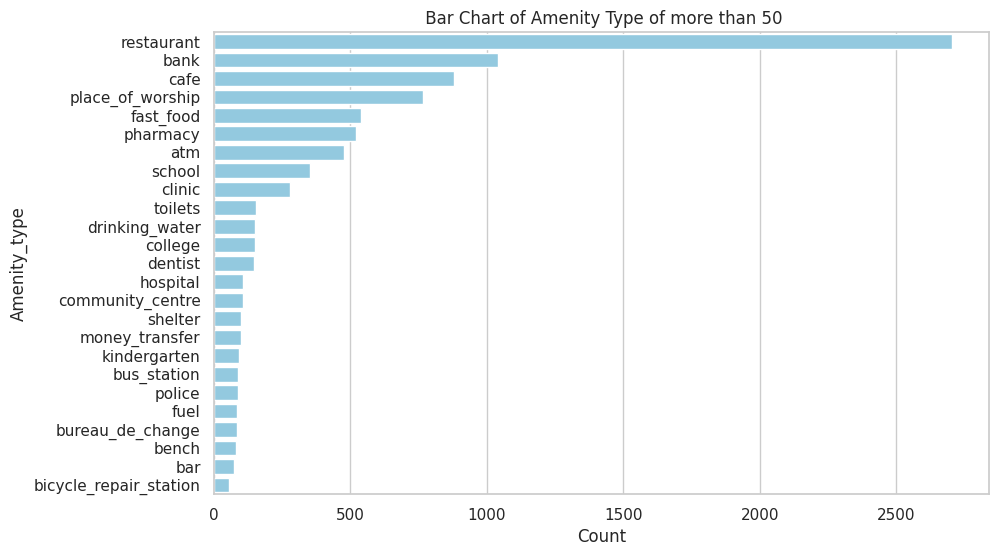

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get value counts for amenities
amenity_counts = df['amenity_type'].value_counts()

# Filter amenities with counts greater than 50
filtered_amenities = amenity_counts[amenity_counts > 50]

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a horizontal bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_amenities.values, y=filtered_amenities.index, color='skyblue')
plt.title(' Bar Chart of Amenity Type of more than 50')
plt.xlabel('Count')
plt.ylabel('Amenity_type')
plt.show()


Restaurant is Highest, Now plot in the map.

## For Visualizing Geospatial Data

- Install folium package

In [174]:
!pip install folium


- Create an interactive Folium map with markers for locations that match the specified amenity_types column

In [175]:
import folium
from folium.plugins import MarkerCluster

# Example types
types = ['restaurant']

# Filter rows where 'amenity_type' is in the specified types and 'coordinates' is not null
filtered_data = df[(df['amenity_type'].isin(types)) & df['coordinates'].notna()]

# Extract latitude and longitude from the 'coordinates' column
coordinates_split = filtered_data['coordinates'].str.split(',', expand=True).astype(float)
filtered_data['latitude'] = coordinates_split[0]
filtered_data['longitude'] = coordinates_split[1]

# Create a map centered around the first location
if not filtered_data.empty:
    map_center = [filtered_data['latitude'].iloc[0], filtered_data['longitude'].iloc[0]]
    map_osm = folium.Map(location=map_center, zoom_start=12)

    # Create a MarkerCluster layer for better visualization if there are multiple points
    marker_cluster = MarkerCluster().add_to(map_osm)

    # Add markers for each location
    for index, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
        ).add_to(marker_cluster)

else:
    print("No data for specified types with valid coordinates.")


<ipython-input-175-42e72467aa66>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['latitude'] = coordinates_split[0]
<ipython-input-175-42e72467aa66>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['longitude'] = coordinates_split[1]


In [176]:
#display map
map_osm